# Logistic regression with PyTorch

In [35]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader

# torchvision: popular datasets, model architectures, and common image transformations for computer vision.
from torchvision import datasets
from torchvision.transforms import transforms

from random import randint
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt


'''
Step 1: Prepare dataset
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1

In [36]:
'''
Step 2: Define the neural network class
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=True)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

In [37]:
'''
Step 3: Create the model, specify loss function and optimizer.
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)   # specify SGD with learning rate

In [38]:
'''
Step 4: Train model with SGD
'''
import time
start = time.time()
for _ in range(1000) :
    # Sample a random data for training
    ind = randint(0, len(train_set.data)-1)
    image, label = train_set.data[ind], train_set.targets[ind]

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()

    #(This syntax will make more sense once we learn about minibatches)

    # perform SGD step (parameter update)
    optimizer.step()
    
end = time.time()
print(f"Time ellapsed in training is: {end-start}")

Time ellapsed in training is: 0.2060258388519287


In [39]:
'''
Step 5: Test model (Evaluate the accuracy)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Evaluate accuracy using test data
for ind in range(len(test_set.data)) :

    image, label = test_set.data[ind], test_set.targets[ind]

    # evaluate model
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_set.data), correct, len(test_set.data),
        100. * correct / len(test_set.data)))

[Test set] Average loss: 5.8580, Accuracy: 1885/1991 (94.68%)



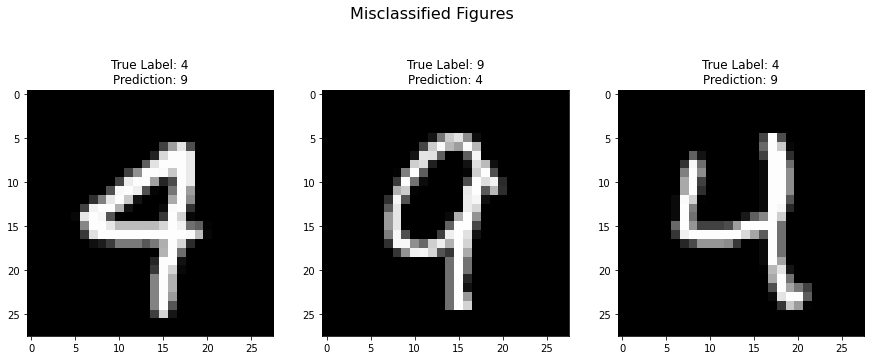

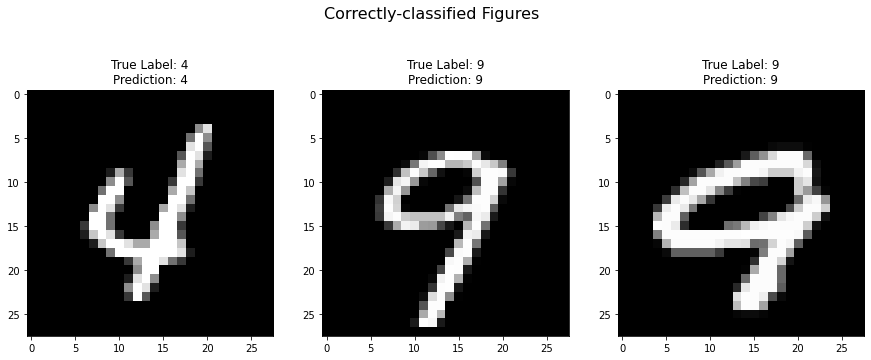

In [40]:
'''
Step 6: Show some incorrectly classified images and some correctly classified ones
''' 

# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

# Inspect model parameters

In [41]:
# model parameters visible as an iterator (generator is an iterator)
# print(model.parameters())

# for parameter in model.parameters():
#     print(parameter.shape)

# # model parameter directly obtainable from layer
print(model.linear)
print(model.linear.weight.shape)
print(model.linear.bias)  #available if bias=True




Linear(in_features=784, out_features=1, bias=True)
torch.Size([1, 784])
Parameter containing:
tensor([-0.0199], requires_grad=True)


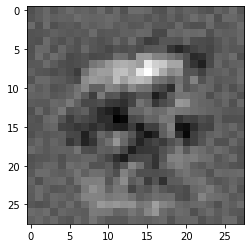

In [42]:
# view the weight trained through logistic regression
weight = model.linear.weight.detach().reshape(28,28).numpy()
weight = weight - np.min(weight)
weight = weight/np.max(weight)
plt.imshow(weight, cmap='gray')
plt.show()

DataLoader utility simplifies accessing data in training and testing

Time ellapsed in training is: 0.3480958938598633
[Test set] Average loss: 0.1989, Accuracy: 1850/1991 (92.92%)



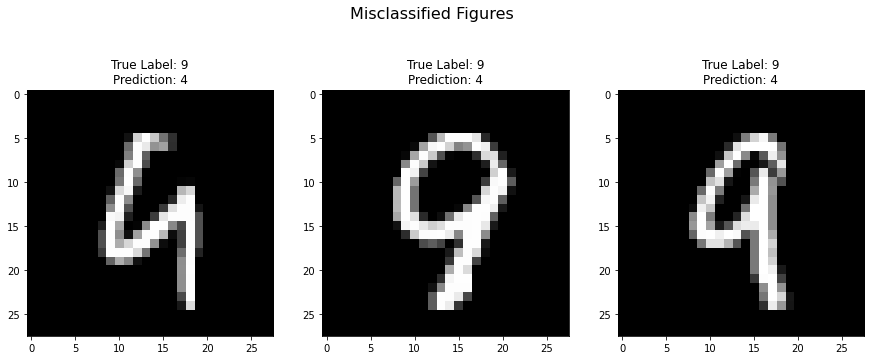

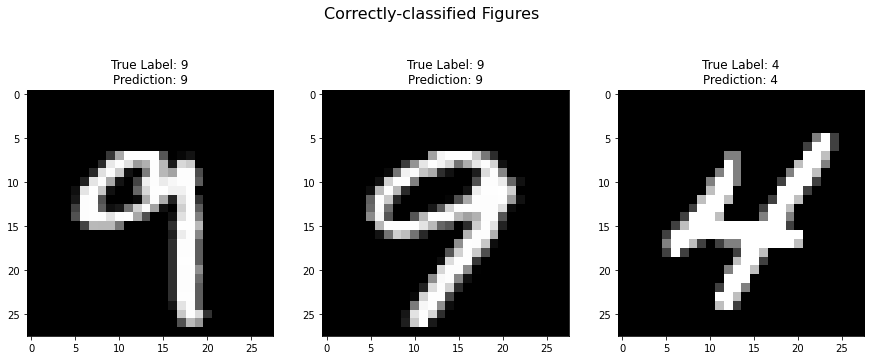

In [43]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
from random import shuffle


'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: (LOOK HERE)
'''
model = LR()                                   

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                               
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # LR scaled up by 255

    
'''
Step 4: Train model with SGD (LOOK HERE)
'''
# Use DataLoader class (Press Ctrl+/ to comment in/out)

# 1. SGD
# from torch.utils.data import RandomSampler
# train_loader = DataLoader(dataset=train_set, batch_size=1, sampler=RandomSampler(train_set, replacement=True))

# 2. cyclic SGD
# train_loader = DataLoader(dataset=train_set, batch_size=1)

# 3. shuffled cyclic SGD
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)

# Train the model
import time
start = time.time()
iter_count = 0

for image,label in train_loader :
    iter_count += 1
    if iter_count > 1000:
        break

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()

    # perform SGD step (parameter update)
    optimizer.step()
end = time.time()
print(f"Time ellapsed in training is: {end-start}")

'''
Step 5: Test model (LOOK HERE)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

DataLoader scales the image by a factor of 255 and converts the data type to a float.

In [44]:
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
print(train_set.data[0])
# train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)
# print(next(iter(train_loader)))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

The data loader creates a iterator that end when all data has been processed

Time ellapsed in training is: 4.084276914596558
[Test set] Average loss: 0.1153, Accuracy: 1907/1991 (95.78%)



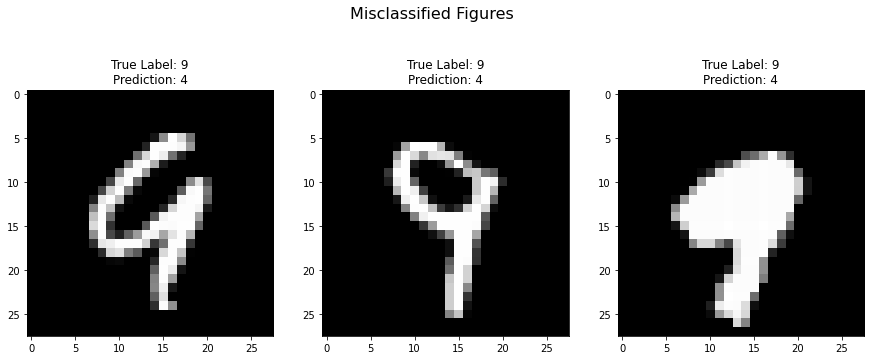

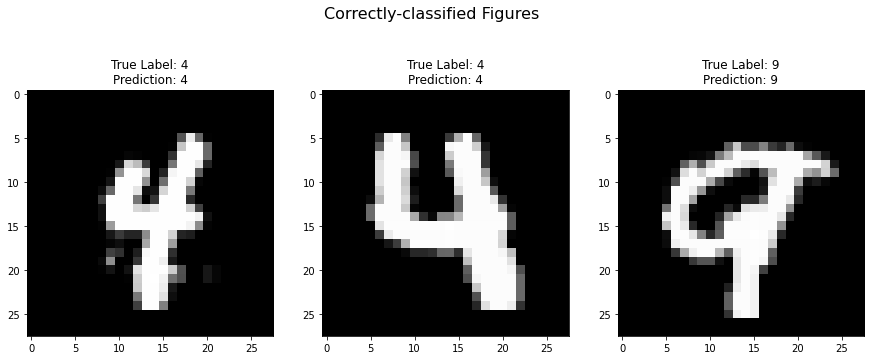

In [45]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
from random import shuffle


'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: (same step)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate

    
'''
Step 4: Train model with SGD (LOOK HERE)
'''

# shuffled cyclic SGD
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)

import time
start = time.time()
# Train the model (single epoch)
for image, label in train_loader :

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()

    # perform SGD step (parameter update)
    optimizer.step()    
end = time.time()
print(f"Time ellapsed in training is: {end-start}")

'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

Running multiple epochs

Time ellapsed in training is: 12.343320608139038
[Test set] Average loss: 0.0893, Accuracy: 1922/1991 (96.53%)



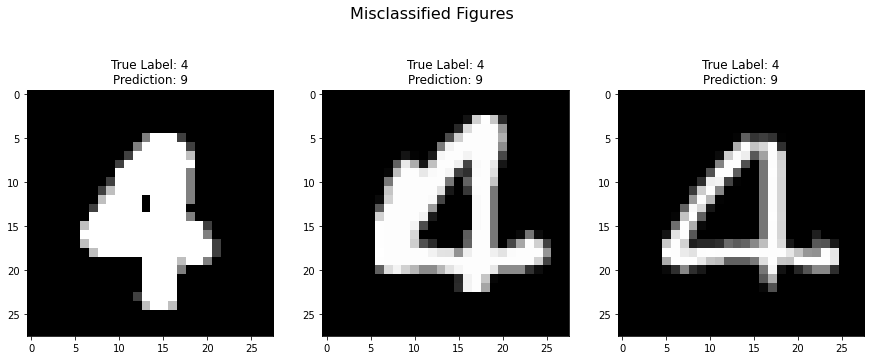

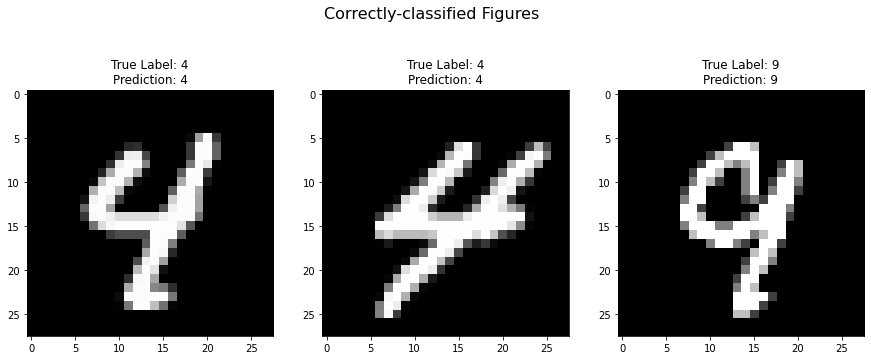

In [46]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from random import shuffle

'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: (same step)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate



'''
Step 4: Train model with SGD (LOOK HERE)
'''
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)

import time
start = time.time()
# Train the model for 3 epochs
for epoch in range(3) :
    for image, label in train_loader :
        # Clear previously computed gradient
        optimizer.zero_grad()

        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(image), label.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print(f"Time ellapsed in training is: {end-start}")


'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

Using batch update

Time ellapsed in training is: 5.357270240783691
[Test set] Average loss: 0.1748, Accuracy: 1895/1991 (95.18%)



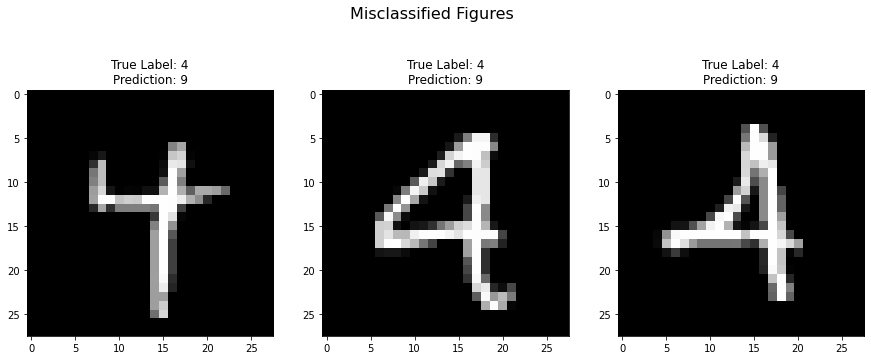

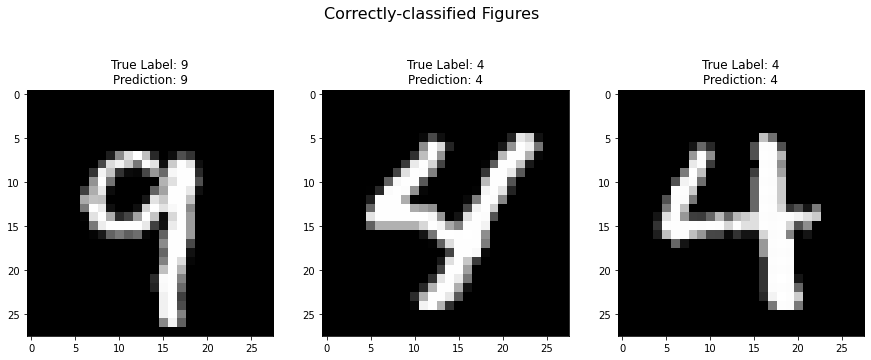

In [47]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from random import shuffle
'''
Step 1: (same step)
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1
    

'''
Step 2: (same step)
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)

    ''' forward given input x '''
    def forward(self, x) :
        #B = batchsize
        # x input has dim [B,1,28,28]
        # convert this to dim [B,784]
        # after linear operation, output is dim [B,1]
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer. (LOOK HERE)
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    #output has dim [B,1]
    #target has dim [B]
    #dimensions as is don't match!
    #convert output dim to [B]
    #conert target dim to [B]
    #elementwise product (* is elementwise product in Python) 
    #after logsigmoid, dim is [B]
    #after mean, dim is [1]
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=255*1e-4)   # specify SGD with learning rate



'''
Step 4: Train model with SGD (LOOK HERE)
'''
train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)

import time
start = time.time()
# Train the model (for 3 epochs)
for epoch in range(3) :
    for images, labels in train_loader :
        # Clear previously computed gradient
        optimizer.zero_grad()

        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print(f"Time ellapsed in training is: {end - start}")


'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)
# no need to shuffle test data

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 : 
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

'''
Step 6: (same step)
''' 
# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_2))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_1))
    plt.imshow(image, cmap='gray')
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].cpu().numpy().astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_1, label_1))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(label_2, label_2))
    plt.imshow(image, cmap='gray')
plt.show()

CIFAR10 (two classes) with logistic regression trained with random permutation cyclic batch SGD

Files already downloaded and verified
Time ellapsed in training is: 12.12409257888794
[Test set] Average loss: 0.5001, Accuracy: 1536/2000 (76.80%)



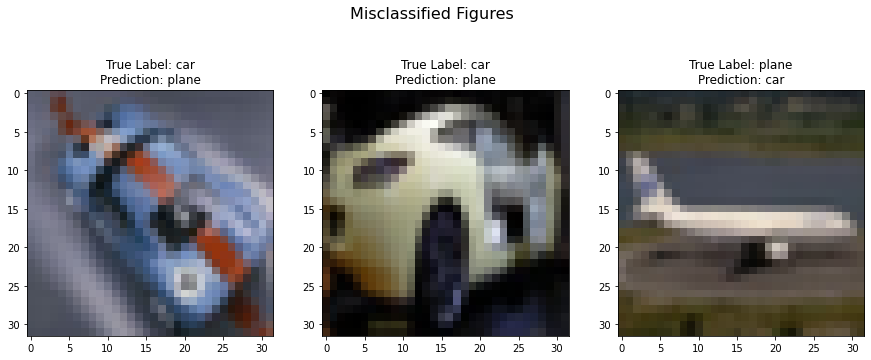

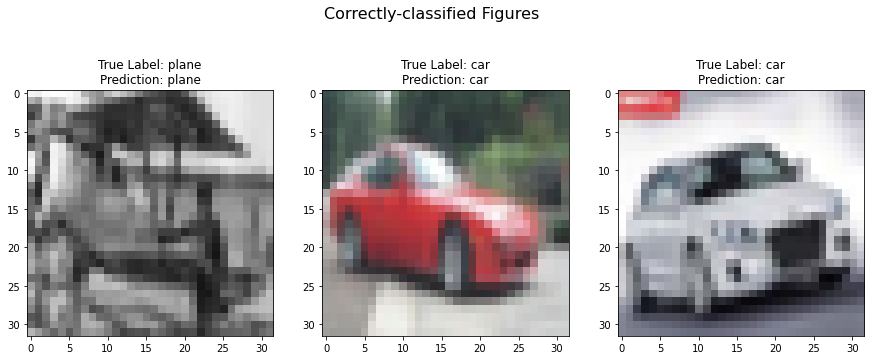

In [48]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from random import shuffle


'''
Step 1: Prepare dataset
'''
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
label_1 = classes.index('plane')
label_2 = classes.index('car')

train_set = datasets.CIFAR10(root='./cifar_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
train_set.targets = torch.tensor(train_set.targets)
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1


test_set = datasets.CIFAR10(root='./cifar_data/', train=False, transform=transforms.ToTensor(), )

# Use data with two labels
test_set.targets = torch.tensor(test_set.targets)
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1


'''
Step 2: Define the neural network class.
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # CIFAR-10 data is 32*32 images with 3 RGB channels
    def __init__(self, input_dim=3*32*32) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)
        
    ''' forward given input x '''
    def forward(self, x) :
        #reshape input into dim [B,3*32*32]
        #output has dim [B,1]
        x = self.linear(x.float().view(-1, 3*32*32))    # Flattens the given data(tensor)
        return x
    

'''
Step 3: Create the model, specify loss function and optimizer.
'''
model = LR()  # Define Neural Network Models 

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))
loss_function = logistic_loss                            # Specify loss function

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)  # specify SGD with learning rate



'''
Step 4: Train model with SGD
'''
# Use DataLoader class
train_loader = DataLoader(dataset=train_set, batch_size=1024, shuffle=True)
import time
start = time.time()
# Train the model
for epoch in range(10) :
    for images, labels in train_loader :

        # Clear previously computed gradient
        optimizer.zero_grad()
        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print(f"Time ellapsed in training is: {end - start}")
    

'''
Step 5: Test model (Evaluate the accuracy)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)
    
    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))



'''
Step 6: Show some incorrectly classified images and some correctly classified ones
''' 
# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]
    
    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_2]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_1]))
    plt.imshow(image)
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_1]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_2]))
    plt.imshow(image)
plt.show()

CIFAR10 with Multilayer perceptron

Files already downloaded and verified
Time ellapsed in training is: 213.10205554962158
[Test set] Average loss: 0.3722, Accuracy: 1634/2000 (81.70%)



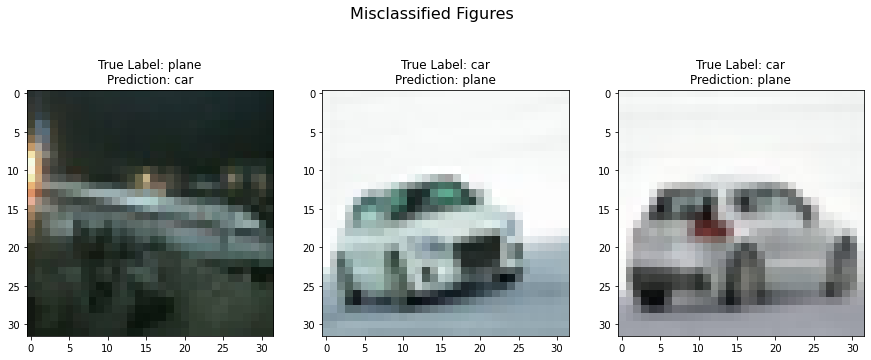

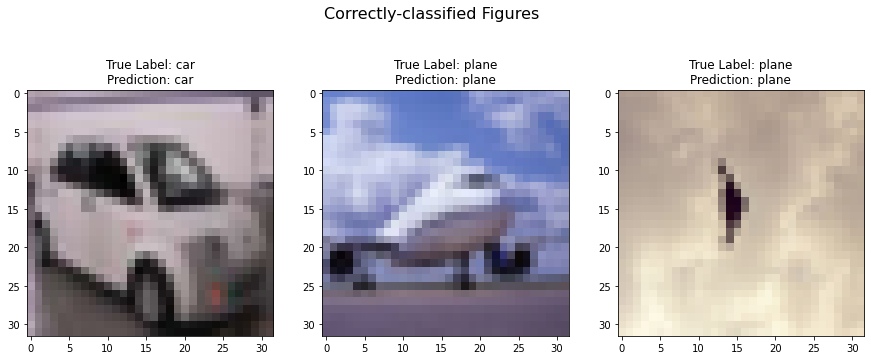

In [49]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
from numpy import linspace


'''
Step 1: (same step)
'''
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
label_1 = classes.index('plane')
label_2 = classes.index('car')

train_set = datasets.CIFAR10(root='./cifar_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
train_set.targets = torch.tensor(train_set.targets)
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1


test_set = datasets.CIFAR10(root='./cifar_data/', train=False, transform=transforms.ToTensor(), )

# Use data with two labels
test_set.targets = torch.tensor(test_set.targets)
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1


'''
Step 2: Define the neural network class (LOOK HERE)
'''
class MLP4(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # CIFAR-10 data is 32*32 images with 3 RGB channels
    def __init__(self, input_dim=3*32*32) :
        super().__init__()
        self.linear = nn.Linear(input_dim, input_dim//2, bias=True)
        self.linear2 = nn.Linear(input_dim//2, input_dim//4, bias=True)
        self.linear3 = nn.Linear(input_dim//4, input_dim//8, bias=True)
        self.linear4 = nn.Linear(input_dim//8, 1, bias=True)
        
    ''' forward given input x '''
    def forward(self, x) :
        x = x.float().view(-1, 3*32*32)
        x = nn.functional.relu(self.linear(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = self.linear4(x)
        return x
    
    
'''
Step 3: Create the model, specify loss function and optimizer (LOOK HERE)
'''
model = MLP4()  # Define Neural Network Models 

def logistic_loss(output, target):
    return torch.mean(-torch.nn.functional.logsigmoid(target.reshape(-1)*output.reshape(-1)))
loss_function = logistic_loss                            # Specify loss function

optimizer = torch.optim.SGD(model.parameters(), lr=3*1e-2)  # specify SGD with learning rate



'''
Step 4: (same step)
'''
# Use DataLoader class
train_loader = DataLoader(dataset=train_set, batch_size=1024, shuffle=True)
import time
start = time.time()
# Train the model
for epoch in range(100) :
    for images, labels in train_loader :

        # Clear previously computed gradient
        optimizer.zero_grad()
        # then compute gradient with forward and backward passes
        train_loss = loss_function(model(images), labels.float())
        train_loss.backward()

        # perform SGD step (parameter update)
        optimizer.step()
end = time.time()
print(f"Time ellapsed in training is: {end - start}")
    


'''
Step 5: (same step)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Test data
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)

# Evaluate accuracy using test data
for ind, (image, label) in enumerate(test_loader) :

    # Forward pass
    output = model(image)
    
    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))



'''
Step 6: (same step)
''' 
# Misclassified images
shuffle(misclassified_ind)
fig = plt.figure(1, figsize=(15, 6))
fig.suptitle('Misclassified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[misclassified_ind[k]].astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[misclassified_ind[k]]
    
    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_2]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_1]))
    plt.imshow(image)
plt.show()

# Correctly classified images
shuffle(correct_ind)
fig = plt.figure(2, figsize=(15, 6))
fig.suptitle('Correctly-classified Figures', fontsize=16)

for k in range(3) :
    image = test_set.data[correct_ind[k]].astype('uint8')
    ax = fig.add_subplot(1, 3, k+1)
    true_label = test_set.targets[correct_ind[k]]

    if true_label == -1 :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_1], classes[label_1]))
    else :
        ax.set_title('True Label: {}\nPrediction: {}'.format(classes[label_2], classes[label_2]))
    plt.imshow(image)
plt.show()

In [50]:
print("MLP model parameters")
param_num = 0
for parameter in model.parameters():
    print(parameter.shape)
    param_num += parameter.numel()
print(f"MLP has a total of {param_num} parameters.")

MLP model parameters
torch.Size([1536, 3072])
torch.Size([1536])
torch.Size([768, 1536])
torch.Size([768])
torch.Size([384, 768])
torch.Size([384])
torch.Size([1, 384])
torch.Size([1])
MLP has a total of 6196225 parameters.


# Softmax regression for MNIST

In [11]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
'''
Step 1: Load the entire MNIST dataset (LOOK HERE)
'''

train_set = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_set = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())


'''
Step 2: Since there are 10 classes, the output should be 10 (LOOK HERE)
'''
class softmax(nn.Module) :
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 10, bias=True)

    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer (LOOK HERE)
'''
model = softmax()
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


'''
Step 4: (same step)
'''
train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)

import time
start = time.time()
for epoch in range(5) :
    for images, labels in train_loader :
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()
        optimizer.step()
end = time.time()
print(f"Time ellapsed in training is: {end - start}")


'''
Step 5: Test model (Evaluate the accuracy)
'''
test_loss, correct = 0, 0

test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)

for ind, (image, label) in enumerate(test_loader) :
    output = model(image)
    test_loss += loss_function(output, label).item()
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(label.view_as(pred)).sum().item()

            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_loader), correct, len(test_loader),
        100. * correct / len(test_loader)))

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw
Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw
Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw
Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw
Processing...
Done!


/Users/ernestryu/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603740477510/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Time ellapsed in training is: 20.37763786315918
[Test set] Average loss: 0.8003, Accuracy: 8471/10000 (84.71%)



# GPU computing on PyTorch

Check availability of GPU on system

In [1]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())

print(torch.__version__)

False
0
1.7.0


Use `.to(device)` to create a copy of a tensor on the GPU

In [4]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

device = "cpu"
# device = "cuda:0"
#device = "cuda:5" #error if you have fewer than 6 GPUs

t_dev = t.to(device)

print(t.device)
print(t_dev.device)

cpu
cpu


Perform power iteration

In [9]:
import torch
import numpy as np
N = 8192
A = torch.normal(0,1/np.sqrt(N),(N,N))    #8*8192^2=512Mb data
x = torch.normal(0.0, 1.0,(N,1))


device = "cpu"
# device = "cuda:0"
A = A.to(device)
x = x.to(device)    #error if A is sent to GPU but x is not sent to GPU

import time
start = time.time()
for _ in range(100):
    x = A@x  # matrix-vector product
end = time.time()
print(f"Time ellapsed in loop is: {end - start}")

x = x.to("cpu")
print(np.linalg.norm(x))

Time ellapsed in loop is: 1.3693819046020508
86.06098


# Calssification via MLP on GPU

(GPU does not provide a speedup as the model is small.)

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

'''
Step 1
'''
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

'''
Step 2: Define the neural network class (LOOK HERE)
'''
class MLP4(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, input_dim//2, bias=True)
        self.linear2 = nn.Linear(input_dim//2, input_dim//4, bias=True)
        self.linear3 = nn.Linear(input_dim//4, input_dim//8, bias=True)
        self.linear4 = nn.Linear(input_dim//8, 10, bias=True)
        
    ''' forward given input x '''
    def forward(self, x) :
        x = x.float().view(-1, 28*28)
        x = nn.functional.relu(self.linear(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = self.linear4(x)
        return x
'''
Step 3 Instantiate model and send it to device (LOOK HERE)
'''
model = MLP4().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)


'''
Step 4 Load batch, send it to device, and perform SGD (LOOK HERE)
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1024, shuffle=True)

import time
start = time.time()
for epoch in range(1) :
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))



'''
Step 5 Load batch, send it to device, and peform test (LOOK HERE)
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1024, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))
